Found 2869 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5870 - loss: 0.9746 - val_accuracy: 0.4213 - val_loss: 1.8029
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7431 - loss: 0.6210 - val_accuracy: 0.4848 - val_loss: 1.8985
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8407 - loss: 0.4089 - val_accuracy: 0.5711 - val_loss: 2.0026
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8801 - loss: 0.3089 - val_accuracy: 0.6853 - val_loss: 2.2423
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 318ms/step - accuracy: 0.9212 - loss: 0.2044 - val_accuracy: 0.6904 - val_loss: 2.4153
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.9387 - loss: 0.1595 - val_accuracy: 0.6904 - val_loss: 3.2284
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - accuracy: 0.9582 - loss: 0.1124 - val_accuracy: 0.7208 - val_loss: 3.5476
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - accuracy: 0.9648 - loss: 0.1007 - val_accuracy: 0.7

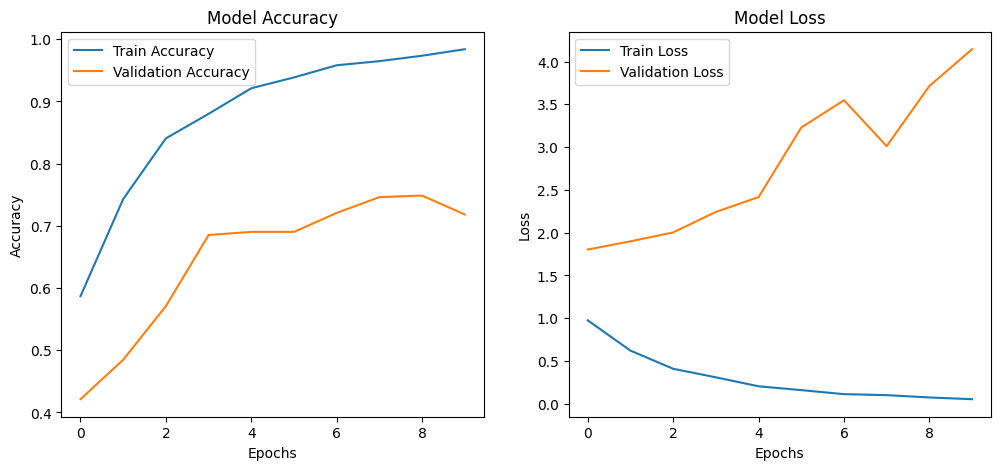

Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


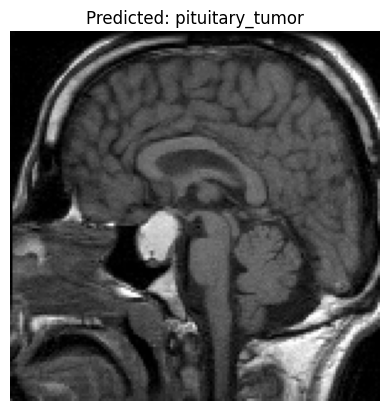

In [ ]:
# Install TensorFlow if not installed
# !pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# Step 1: Define dataset paths
train_dir = r"C:\Users\HP\Downloads\brain tumour\Training"
test_dir = r"C:\Users\HP\Downloads\brain tumour\Testing"

# Step 2: Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Step 3: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Step 7: Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Random predictions on test images
class_labels = list(train_generator.class_indices.keys())
print("Classes:", class_labels)

# Pick a random image from the test set
random_class = random.choice(os.listdir(test_dir))
random_path = os.path.join(test_dir, random_class)
random_img = random.choice(os.listdir(random_path))
img_path = os.path.join(random_path, random_img)

# Load and display image
img = tf.keras.utils.load_img(img_path, target_size=(150,150))
plt.imshow(img)
plt.axis('off')

# Predict
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_label = class_labels[np.argmax(pred)]
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


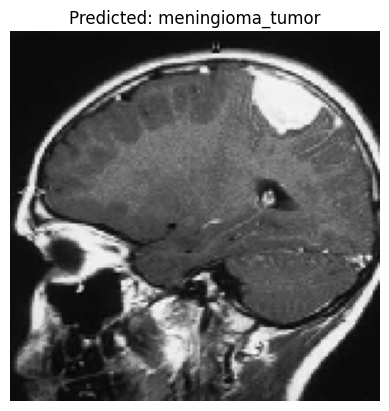

In [14]:
# Load and display image
img = tf.keras.utils.load_img(img_path, target_size=(150,150))
plt.imshow(img)
plt.axis('off')

# Predict
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_label = class_labels[np.argmax(pred)]
plt.title(f"Predicted: {predicted_label}")
plt.show()